In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pickle
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from google.colab import drive
from google.colab import files

In [3]:
import os
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import pickle  # Chỉ cần nếu bạn tải từ file .pkl

ResNet50 model loaded successfully.
MLP model loaded successfully.


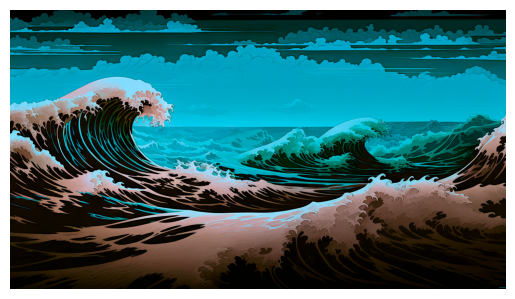

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Nhãn dự đoán: Silk với tỉ lệ confidence: 99.97%
Tổng thời gian từ lúc nhận ảnh đến khi đưa ra dự báo: 6.96 giây


In [ ]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.preprocessing import Normalizer
import time  # Thêm thư viện time

# Đường dẫn đến mô hình
mlp_model_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/model_2/MLP_model_full_train.pkl'
pca_model_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/tuning_model/pca_model.pkl'
uploaded_file = '/content/waves-3840x2160-v0-qwufx6wh3vwb1.png'

# 1. Tải mô hình ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
print("ResNet50 model loaded successfully.")

# 2. Tải mô hình MLP đã huấn luyện
mlp_model = joblib.load(mlp_model_path)
print("MLP model loaded successfully.")

# 3. Tải và xử lý ảnh
def load_and_preprocess_image(uploaded_file):
    img = image.load_img(uploaded_file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Bắt đầu đo thời gian
start_time = time.time()

# Gọi hàm để xử lý ảnh
img_array = load_and_preprocess_image(uploaded_file)

# Hiển thị ảnh
plt.imshow(image.load_img(uploaded_file))
plt.axis('off')
plt.show()

# 4. Trích xuất đặc trưng từ ResNet50
def extract_features(img_array):
    features = base_model.predict(img_array)
    features = features.reshape(1, -1)
    return features

features = extract_features(img_array)

# 5. Chuẩn hóa đặc trưng
def normalize_features(features):
    normalizer = Normalizer()
    features_normalized = normalizer.fit_transform(features)
    return features_normalized

# 6. Áp dụng PCA từ mô hình đã lưu
def apply_pca_from_saved_model(normalized_features, pca_model_path):
    try:
        pca_model = joblib.load(pca_model_path)
        features_pca = pca_model.transform(normalized_features)
        return features_pca
    except FileNotFoundError:
        print("Tệp PCA model không tồn tại. Vui lòng kiểm tra đường dẫn.")
    except Exception as e:
        print(f"Có lỗi xảy ra khi tải mô hình PCA: {e}")
    return None

normalized_features = normalize_features(features)
features_pca = apply_pca_from_saved_model(normalized_features, pca_model_path)

# 7. Dự đoán với MLP model
def predict_with_mlp(features_pca, mlp_model):
    try:
        predictions = mlp_model.predict(features_pca)

        # Lấy tỉ lệ confidence
        confidence_scores = mlp_model.predict_proba(features_pca)
        label_mapping = {0: 'Cotton', 1: 'Denim', 2: 'Nylon', 3: 'Polyester', 4: 'Silk', 5: 'Wool'}
        predicted_label = label_mapping[predictions[0]]
        predicted_confidence = confidence_scores[0][predictions[0]] * 100

        if predicted_confidence < 50:
            print("Ảnh không phù hợp để đưa ra dự đoán.")
            predicted_label = "Unclassified"
            predicted_confidence = 0.0  # Gán tỉ lệ confidence là 0 cho nhãn Unclassified
        else:
            print(f"Nhãn dự đoán: {predicted_label} với tỉ lệ confidence: {predicted_confidence:.2f}%")

        return predicted_label, predicted_confidence
    except Exception as e:
        print(f"Có lỗi xảy ra khi dự đoán: {e}")
    return None

# Gọi hàm dự đoán
predicted_label, predicted_confidence = predict_with_mlp(features_pca, mlp_model)

# Kết thúc đo thời gian
end_time = time.time()
total_time = end_time - start_time
print(f"Tổng thời gian từ lúc nhận ảnh đến khi đưa ra dự báo: {total_time:.2f} giây")


In [12]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.preprocessing import Normalizer
import time  # Thêm thư viện time

# Đường dẫn đến mô hình
mlp_model_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/model_resnet50_origin/MLP_model_full_train.pkl'
uploaded_file = '/content/drive/MyDrive/Gr3_Fabric_Classification/data/Fabrics/Cotton/1273/im_1.png'

# 1. Tải mô hình ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2. Tải mô hình MLP đã huấn luyện
mlp_model = joblib.load(mlp_model_path)

# 3. Tải và xử lý ảnh
def load_and_preprocess_image(uploaded_file):
    img = image.load_img(uploaded_file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Gọi hàm để xử lý ảnh
img_array = load_and_preprocess_image(uploaded_file)

# 4. Trích xuất đặc trưng từ ResNet50
def extract_features(img_array):
    features = base_model.predict(img_array)
    features = features.reshape(1, -1)
    return features

features = extract_features(img_array)

# 5. Chuẩn hóa đặc trưng
def normalize_features(features):
    normalizer = Normalizer()
    features_normalized = normalizer.fit_transform(features)
    return features_normalized

normalized_features = normalize_features(features)

# 6. Dự đoán với MLP model
def predict_with_mlp(normalized_features, mlp_model):
    try:
        predictions = mlp_model.predict(normalized_features)

        # Lấy tỉ lệ confidence
        confidence_scores = mlp_model.predict_proba(normalized_features)
        label_mapping = {0: 'Cotton', 1: 'Denim', 2: 'Nylon', 3: 'Polyester', 4: 'Silk', 5: 'Wool'}
        predicted_label = label_mapping[predictions[0]]
        predicted_confidence = confidence_scores[0][predictions[0]] * 100

        if predicted_confidence < 50:
            predicted_label = "Unclassified"
            predicted_confidence = 0.0  # Gán tỉ lệ confidence là 0 cho nhãn Unclassified

        return predicted_label, predicted_confidence
    except Exception as e:
        return None, None  # Trả về None nếu có lỗi xảy ra

# Gọi hàm dự đoán
predicted_label, predicted_confidence = predict_with_mlp(normalized_features, mlp_model)

# Kết quả chỉ được gán vào các biến, không có lệnh in nào ở đây
import numpy as np
import joblib
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.preprocessing import Normalizer
import time  # Thêm thư viện time

# Đường dẫn đến mô hình
mlp_model_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/model_resnet50_origin/MLP_model_full_train.pkl'
uploaded_file = '/content/drive/MyDrive/Gr3_Fabric_Classification/data/Fabrics/Cotton/1273/im_1.png'

# 1. Tải mô hình ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2. Tải mô hình MLP đã huấn luyện
mlp_model = joblib.load(mlp_model_path)

# 3. Tải và xử lý ảnh
def load_and_preprocess_image(uploaded_file):
    img = image.load_img(uploaded_file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Gọi hàm để xử lý ảnh
img_array = load_and_preprocess_image(uploaded_file)

# 4. Trích xuất đặc trưng từ ResNet50
def extract_features(img_array):
    features = base_model.predict(img_array)
    features = features.reshape(1, -1)
    return features

features = extract_features(img_array)

# 5. Chuẩn hóa đặc trưng
def normalize_features(features):
    normalizer = Normalizer()
    features_normalized = normalizer.fit_transform(features)
    return features_normalized

normalized_features = normalize_features(features)

# 6. Dự đoán với MLP model
def predict_with_mlp(normalized_features, mlp_model):
    try:
        predictions = mlp_model.predict(normalized_features)

        # Lấy tỉ lệ confidence
        confidence_scores = mlp_model.predict_proba(normalized_features)
        label_mapping = {0: 'Cotton', 1: 'Denim', 2: 'Nylon', 3: 'Polyester', 4: 'Silk', 5: 'Wool'}
        predicted_label = label_mapping[predictions[0]]
        predicted_confidence = confidence_scores[0][predictions[0]] * 100

        if predicted_confidence < 50:
            predicted_label = "Unclassified"
            predicted_confidence = 0.0  # Gán tỉ lệ confidence là 0 cho nhãn Unclassified

        return predicted_label, predicted_confidence
    except Exception as e:
        return None, None  # Trả về None nếu có lỗi xảy ra

# Gọi hàm dự đoán
predicted_label, predicted_confidence = predict_with_mlp(normalized_features, mlp_model)

# Kết quả chỉ được gán vào các biến, không có lệnh in nào ở đây
print(predicted_label, predicted_confidence)
print(f"{predicted_label}, {predicted_confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Cotton 99.98714923858643
Kết quả dự đoán:
Nhãn dự đoán: Cotton,confidence: 99.99%


ResNet50 model loaded successfully from /content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/test/resnet50_feature_extractor.h5
MLP model loaded successfully.


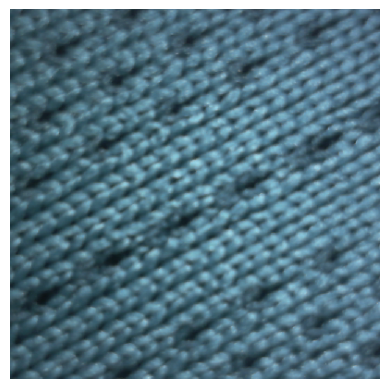

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label: Polyester, Confidence: 55.18%
Total time: 6.00 seconds


In [ ]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.preprocessing import Normalizer
import time
from keras.models import load_model

class FabricClassificationPipeline:
    def __init__(self, mlp_model_path, resnet_model_path):
        # Đường dẫn đến mô hình
        self.mlp_model_path = mlp_model_path

        # Tải mô hình ResNet50 từ đường dẫn đã cho
        self.resnet_model = load_model(resnet_model_path)
        print("ResNet50 model loaded successfully from", resnet_model_path)

        # Tải mô hình MLP đã huấn luyện
        self.mlp_model = joblib.load(self.mlp_model_path)
        print("MLP model loaded successfully.")

        # Khởi tạo normalizer
        self.normalizer = Normalizer()

    def load_and_preprocess_image(self, uploaded_file):
        # Tải và xử lý ảnh
        img = image.load_img(uploaded_file, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return img_array

    def extract_features(self, img_array):
        # Trích xuất đặc trưng từ ResNet50
        features = self.resnet_model.predict(img_array)
        return features.reshape(1, -1)

    def normalize_features(self, features):
        # Chuẩn hóa đặc trưng
        return self.normalizer.fit_transform(features)

    def predict_with_mlp(self, normalized_features):
        # Dự đoán với MLP model
        try:
            predictions = self.mlp_model.predict(normalized_features)
            confidence_scores = self.mlp_model.predict_proba(normalized_features)

            label_mapping = {0: 'Cotton', 1: 'Denim', 2: 'Nylon', 3: 'Polyester', 4: 'Silk', 5: 'Wool'}
            predicted_label = label_mapping.get(predictions[0], "Unknown")
            predicted_confidence = confidence_scores[0][predictions[0]] * 100

            if predicted_confidence < 50:
                predicted_label, predicted_confidence = "Unclassified", 0.0

            print(f"Predicted Label: {predicted_label}, Confidence: {predicted_confidence:.2f}%")
            return predicted_label, predicted_confidence
        except Exception as e:
            print(f"Prediction error: {e}")
            return None, None

    def run_pipeline(self, uploaded_file):
        # Pipeline chính để xử lý và dự đoán ảnh
        start_time = time.time()

        # 1. Xử lý ảnh
        img_array = self.load_and_preprocess_image(uploaded_file)

        # Hiển thị ảnh
        plt.imshow(image.load_img(uploaded_file))
        plt.axis('off')
        plt.show()

        # 2. Trích xuất đặc trưng
        features = self.extract_features(img_array)

        # 3. Chuẩn hóa đặc trưng
        normalized_features = self.normalize_features(features)

        # 4. Dự đoán nhãn
        predicted_label, predicted_confidence = self.predict_with_mlp(normalized_features)

        # Đo tổng thời gian
        end_time = time.time()
        total_time = end_time - start_time
        print(f"Total time: {total_time:.2f} seconds")

        return predicted_label, predicted_confidence, total_time

# Đường dẫn đến mô hình MLP đã lưu
mlp_model_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/model_resnet50_origin/MLP_model_full_train.pkl'
# Đường dẫn đến mô hình ResNet50 đã lưu
resnet_model_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/test/resnet50_feature_extractor.h5'

# Tạo đối tượng pipeline
pipeline = FabricClassificationPipeline(mlp_model_path, resnet_model_path)

# Đường dẫn đến file ảnh
uploaded_file = '/content/drive/MyDrive/Gr3_Fabric_Classification/data/Fabrics/Polyester/1646/im_2.png'

# Chạy pipeline với ảnh đã tải
predicted_label, predicted_confidence, total_time = pipeline.run_pipeline(uploaded_file)


##here


ResNet50 model loaded successfully from /content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/test/resnet50_feature_extractor.h5
MLP model loaded successfully.


Saving im_3 (3).png to im_3 (3).png


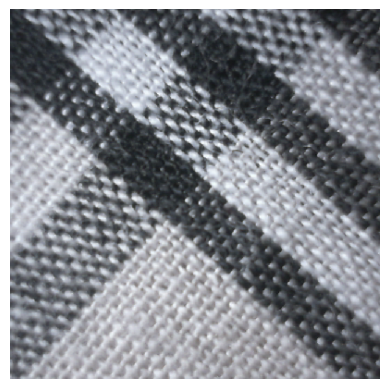

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Label: Cotton, Confidence: 100.00%
Total time: 1.44 seconds


In [4]:
import os
# Tắt tất cả các log của TensorFlow (bao gồm cả tiến trình training và dự đoán)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.preprocessing import Normalizer
import time
from keras.models import load_model
from google.colab import files

class FabricClassificationPipeline:
    def __init__(self, mlp_model_path, resnet_model_path):
        # Đường dẫn đến mô hình
        self.mlp_model_path = mlp_model_path

        # Tải mô hình ResNet50 từ đường dẫn đã cho
        self.resnet_model = load_model(resnet_model_path)
        print("ResNet50 model loaded successfully from", resnet_model_path)

        # Tải mô hình MLP đã huấn luyện
        self.mlp_model = joblib.load(self.mlp_model_path)
        print("MLP model loaded successfully.")

        # Khởi tạo normalizer
        self.normalizer = Normalizer()

    def load_and_preprocess_image(self, uploaded_file):
        # Tải và xử lý ảnh
        img = image.load_img(uploaded_file, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return img_array

    def extract_features(self, img_array):
        # Trích xuất đặc trưng từ ResNet50
        features = self.resnet_model.predict(img_array)
        return features.reshape(1, -1)

    def normalize_features(self, features):
        # Chuẩn hóa đặc trưng
        return self.normalizer.fit_transform(features)

    def predict_with_mlp(self, normalized_features):
        # Dự đoán với MLP model
        try:
            predictions = self.mlp_model.predict(normalized_features)
            confidence_scores = self.mlp_model.predict_proba(normalized_features)

            label_mapping = {0: 'Cotton', 1: 'Denim', 2: 'Nylon', 3: 'Polyester', 4: 'Silk', 5: 'Wool'}
            predicted_label = label_mapping.get(predictions[0], "Unknown")
            predicted_confidence = confidence_scores[0][predictions[0]] * 100

            if predicted_confidence < 50:
                predicted_label, predicted_confidence = "Unclassified", 0.0

            print(f"Predicted Label: {predicted_label}, Confidence: {predicted_confidence:.2f}%")
            return predicted_label, predicted_confidence
        except Exception as e:
            print(f"Prediction error: {e}")
            return None, None

    def run_pipeline(self, uploaded_file):
        # Pipeline chính để xử lý và dự đoán ảnh
        start_time = time.time()

        # 1. Xử lý ảnh
        img_array = self.load_and_preprocess_image(uploaded_file)

        # Hiển thị ảnh
        plt.imshow(image.load_img(uploaded_file))
        plt.axis('off')
        plt.show()

        # 2. Trích xuất đặc trưng
        features = self.extract_features(img_array)

        # 3. Chuẩn hóa đặc trưng
        normalized_features = self.normalize_features(features)

        # 4. Dự đoán nhãn
        predicted_label, predicted_confidence = self.predict_with_mlp(normalized_features)

        # Đo tổng thời gian
        end_time = time.time()
        total_time = end_time - start_time
        print(f"Total time: {total_time:.2f} seconds")

        return predicted_label, predicted_confidence, total_time

# Đường dẫn đến mô hình MLP đã lưu
mlp_model_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/model_resnet50_origin/MLP_model_full_train.pkl'
# Đường dẫn đến mô hình ResNet50 đã lưu
resnet_model_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/test/resnet50_feature_extractor.h5'

# Tạo đối tượng pipeline
pipeline = FabricClassificationPipeline(mlp_model_path, resnet_model_path)

# Cho phép người dùng tải lên tệp hình ảnh
uploaded = files.upload()

# Lấy tên tệp được tải lên
uploaded_file = next(iter(uploaded))

# Chạy pipeline với ảnh đã tải lên
predicted_label, predicted_confidence, total_time = pipeline.run_pipeline(uploaded_file)
